In [43]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [44]:
#read dataset
data=pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head()

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [45]:
#understand features 


#age - in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - 1 or 0

In [46]:
data.isnull().values.any()

data.dtypes

data.describe()

age          sex  chest_pain_type  resting_bp_s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST_slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

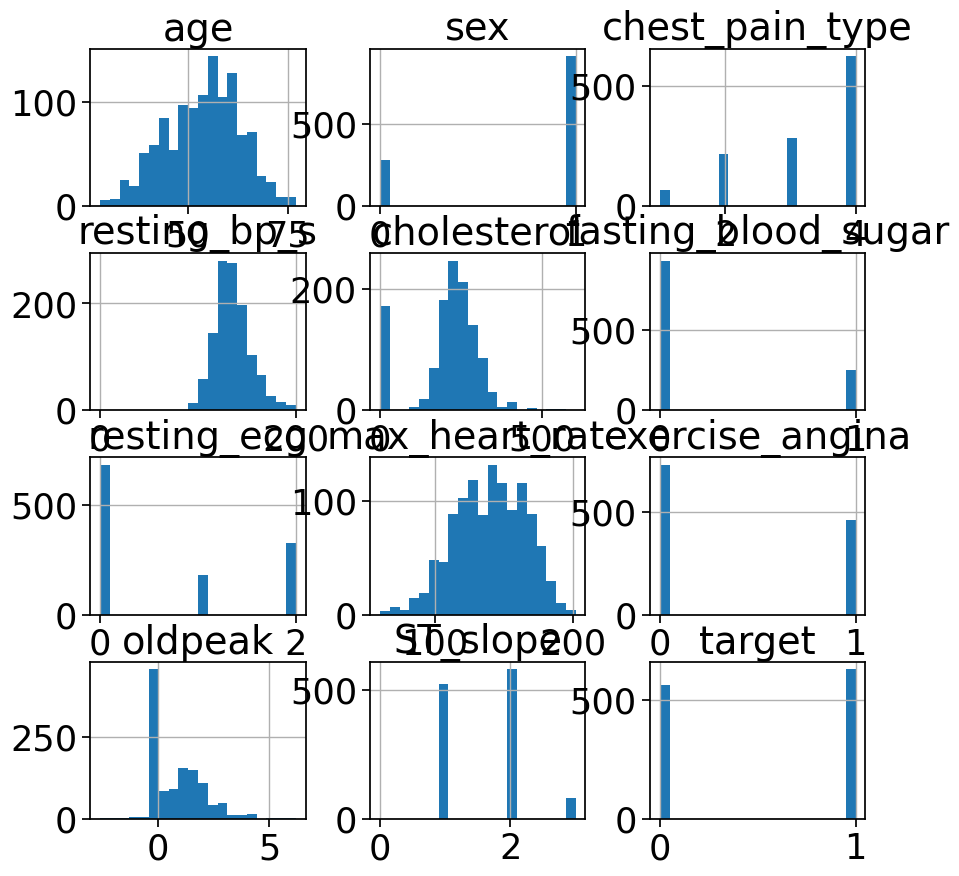

In [47]:
#histogram
data.hist(bins=20,figsize=(10,10))
plt.show()

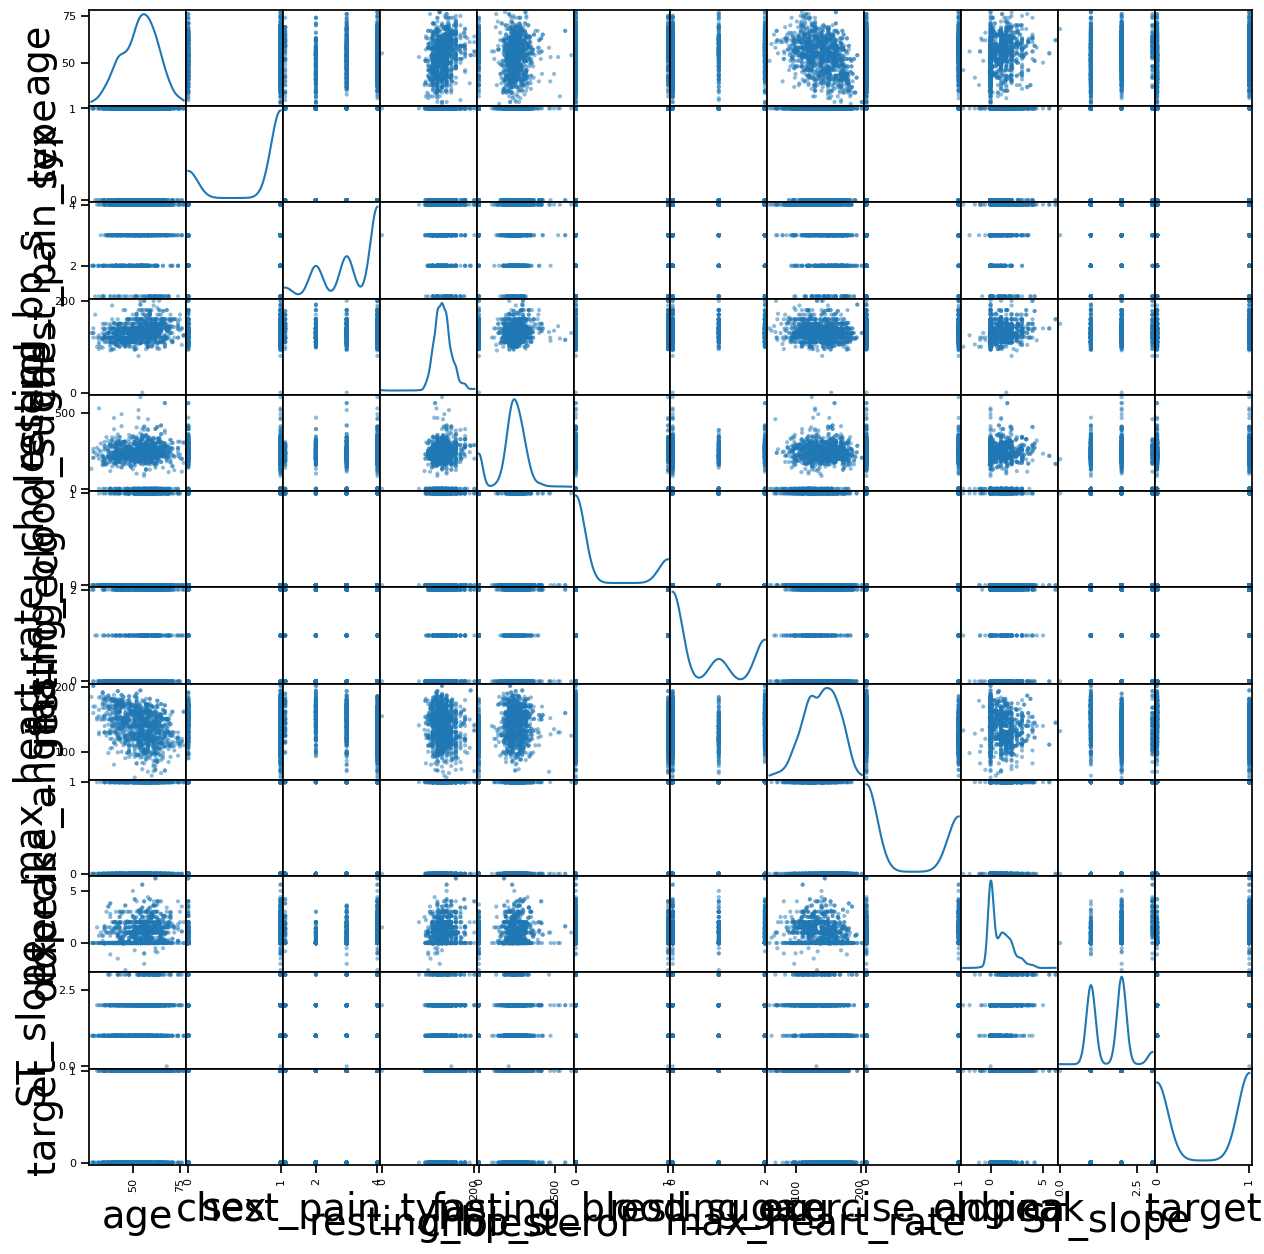

In [48]:
#scatter matrix
pd.plotting.scatter_matrix(data,figsize=(15,15),diagonal ='kde')
plt.show()

In [49]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

categorical_val

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'ST_slope',
 'target']

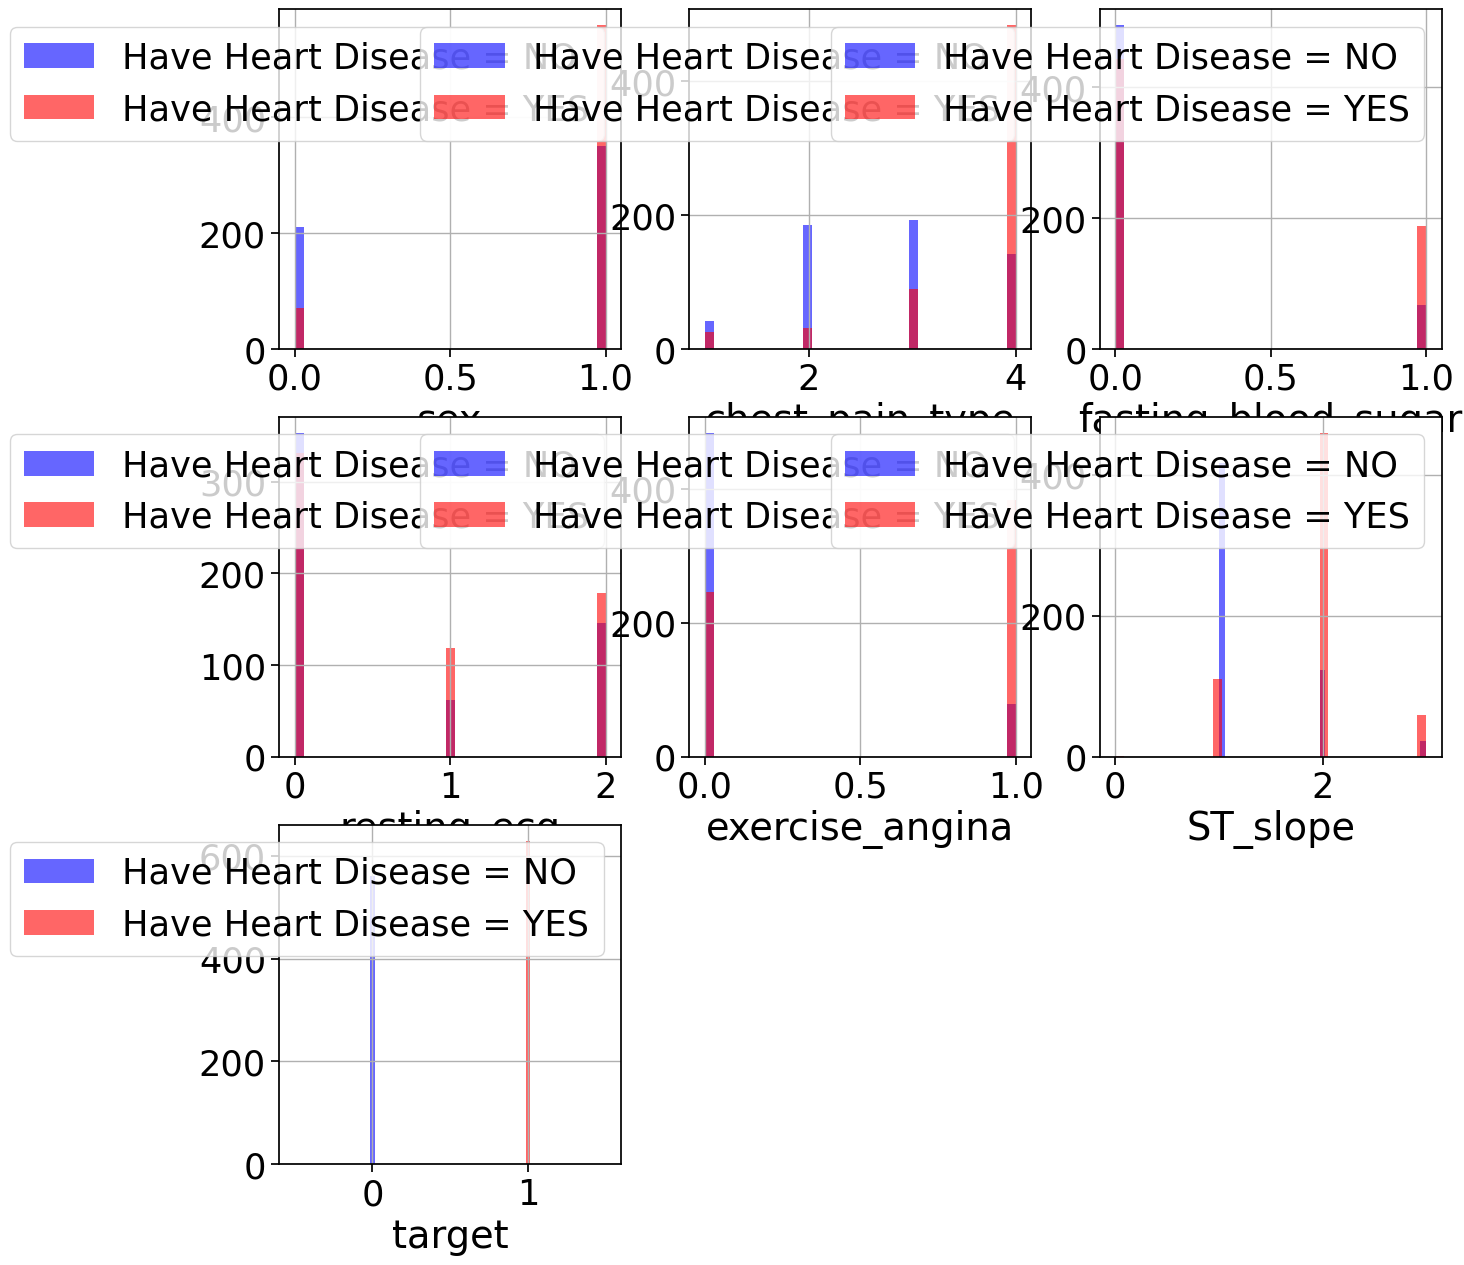

In [50]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

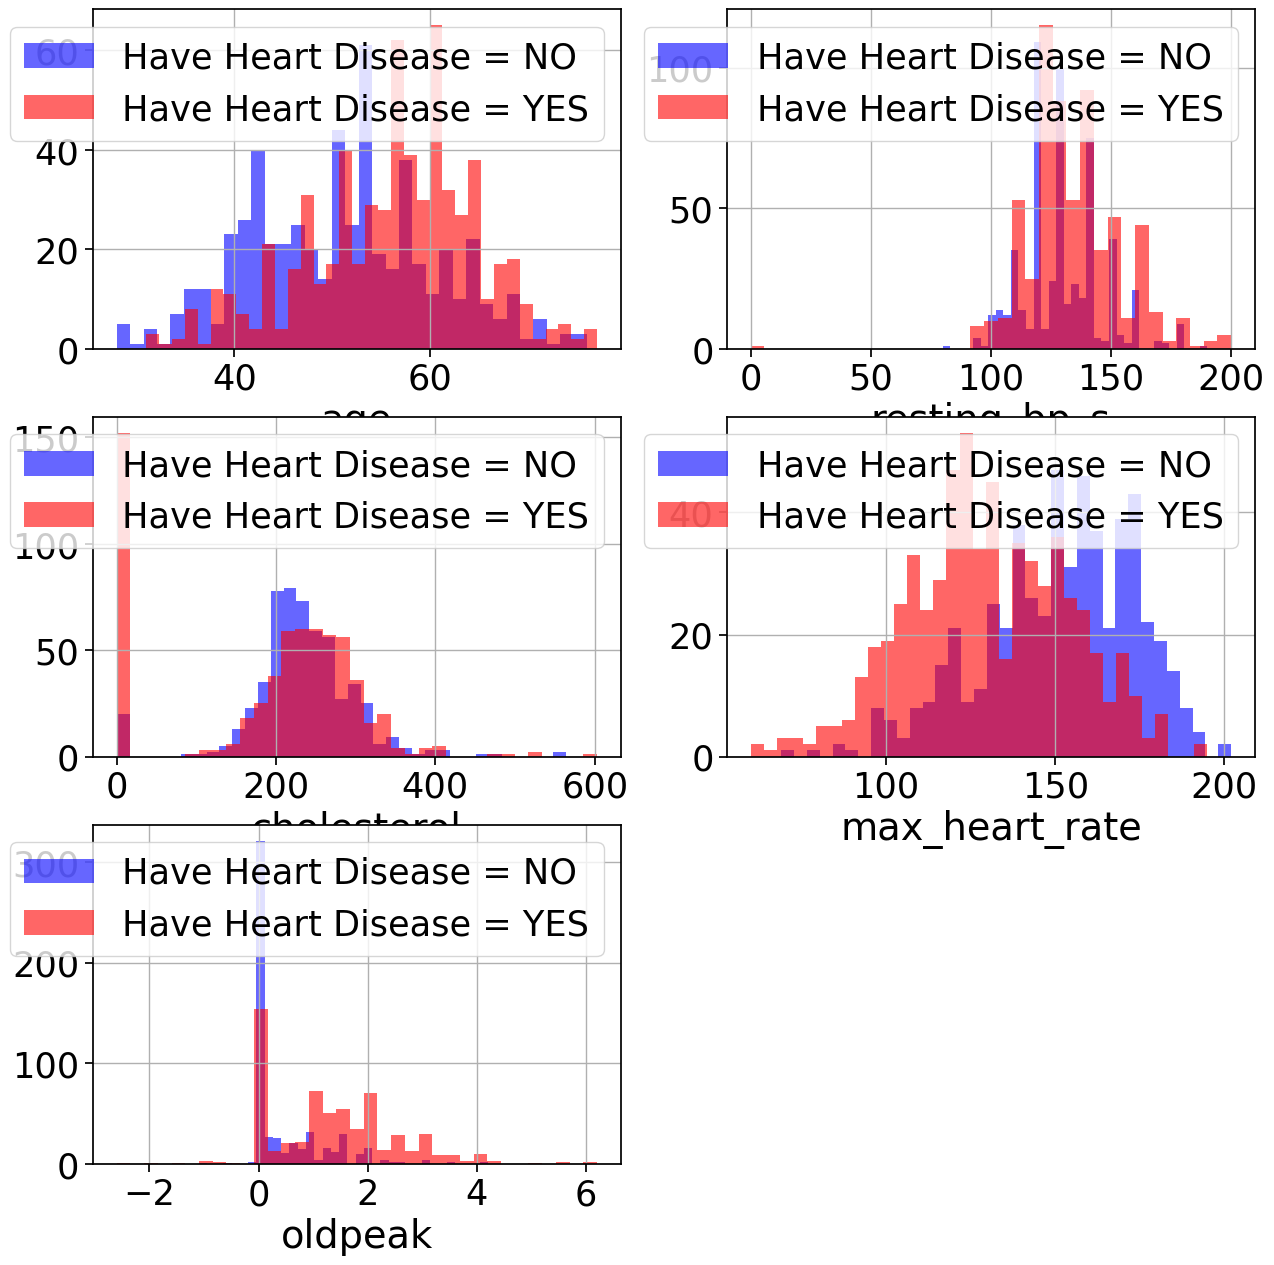

In [51]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

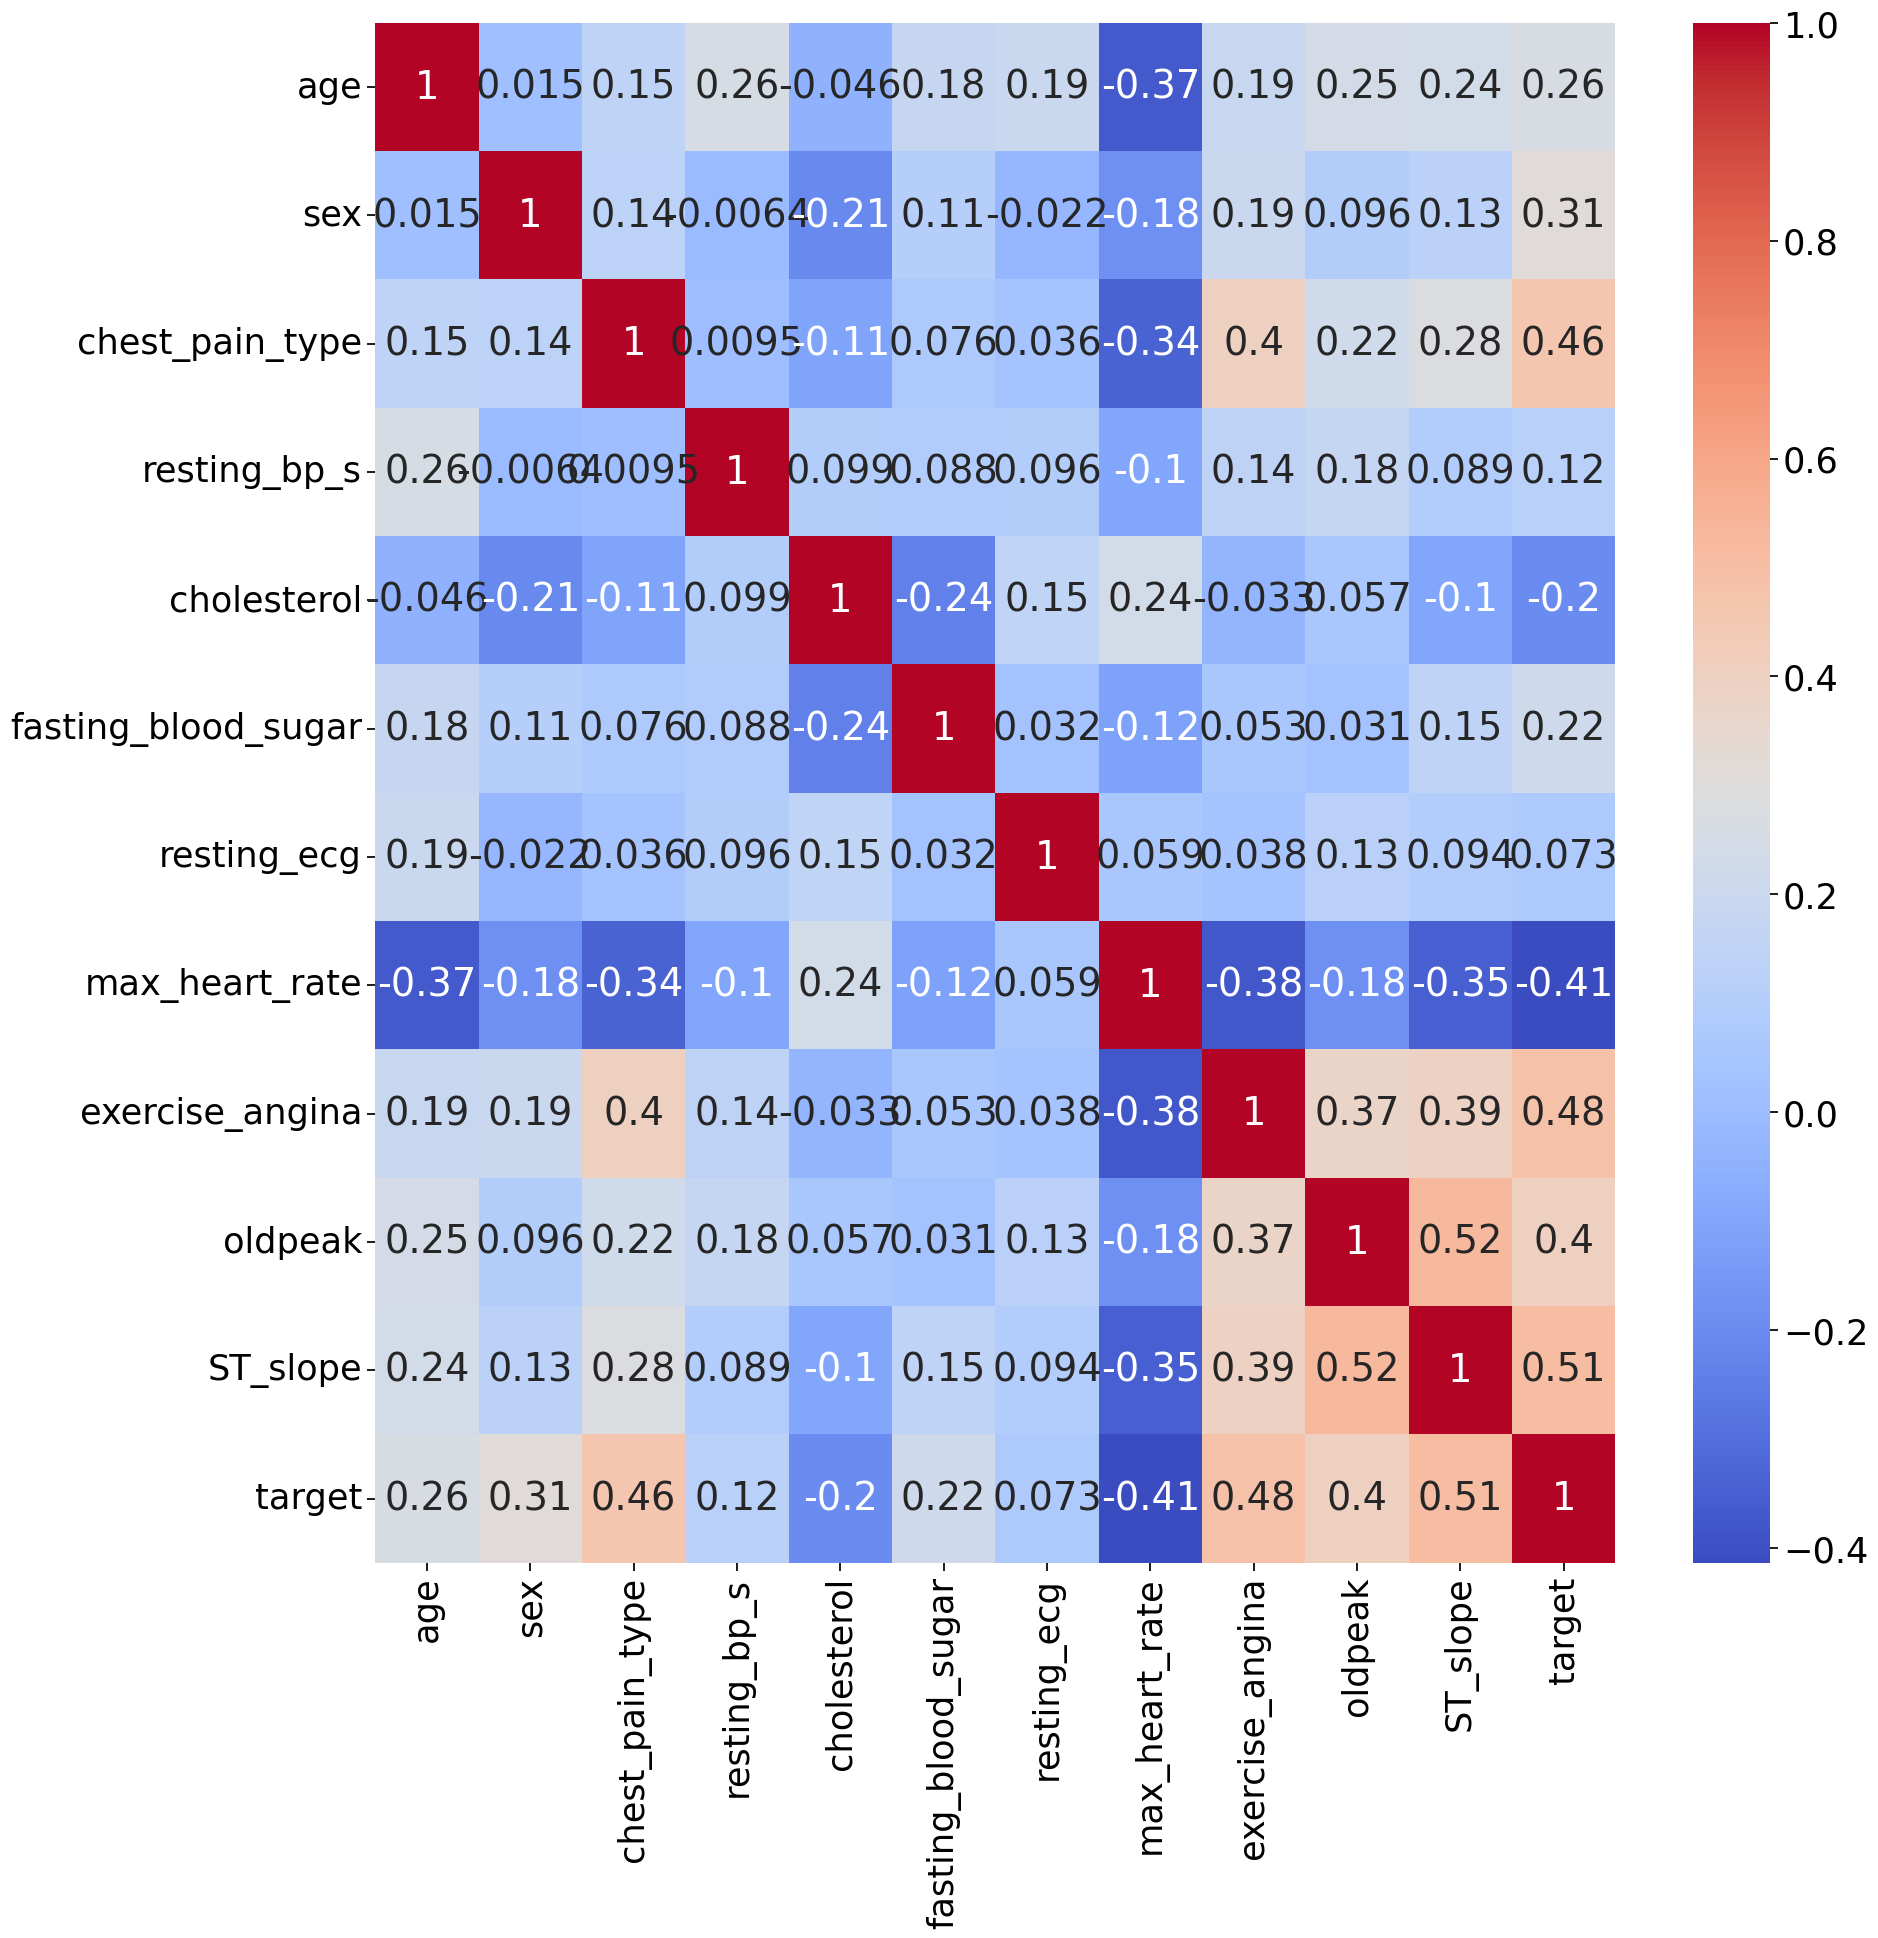

In [52]:
#feature Selection
plt.figure(figsize=(20,20))
d= sns.heatmap(data.corr(),cmap="coolwarm",annot=True)
# red->+ve coorelation,blue->-ve coorelation ,skyblue->0 coorelation

<AxesSubplot: >

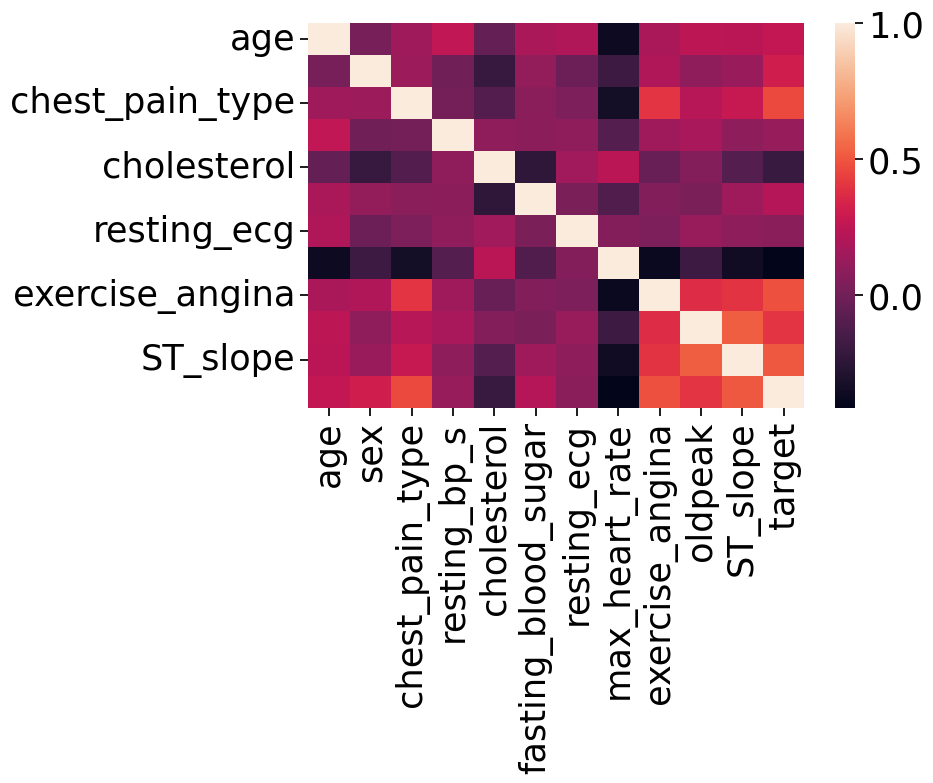

In [53]:
#Method 2
#correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

#In plot we can see there is higher correlation between target and cp (chest pain) ,
#target and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

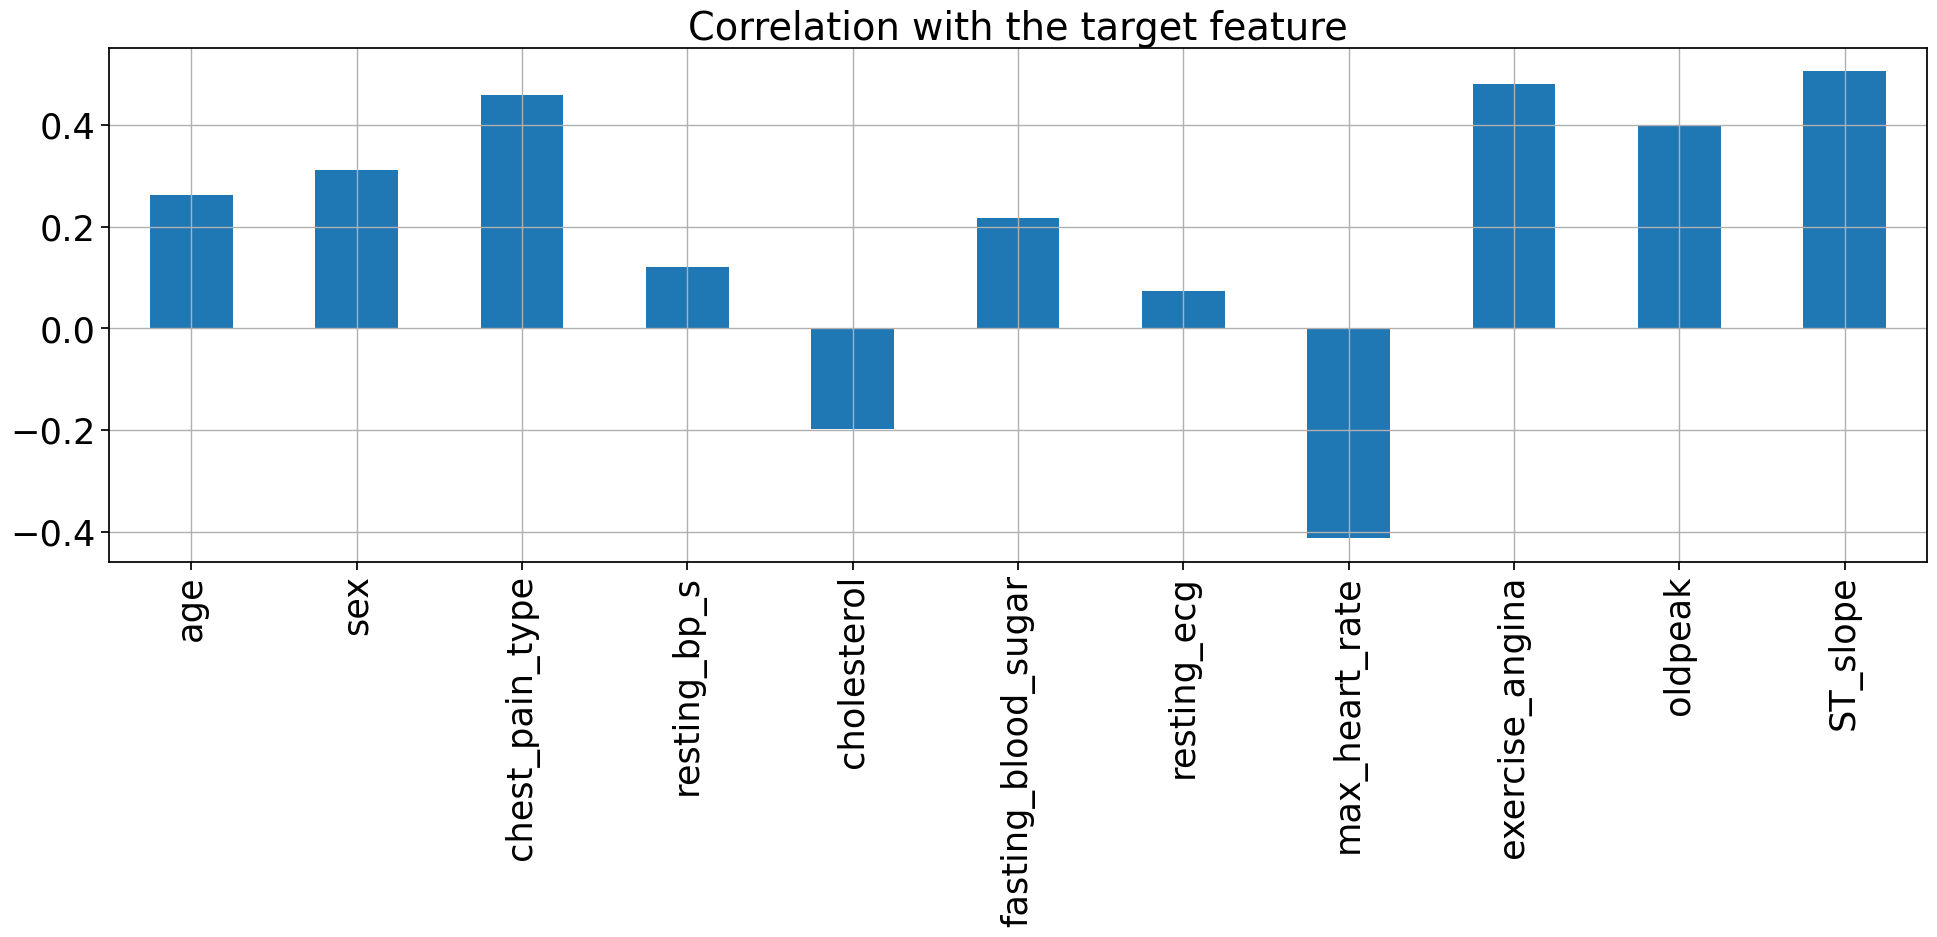

In [54]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

<AxesSubplot: >

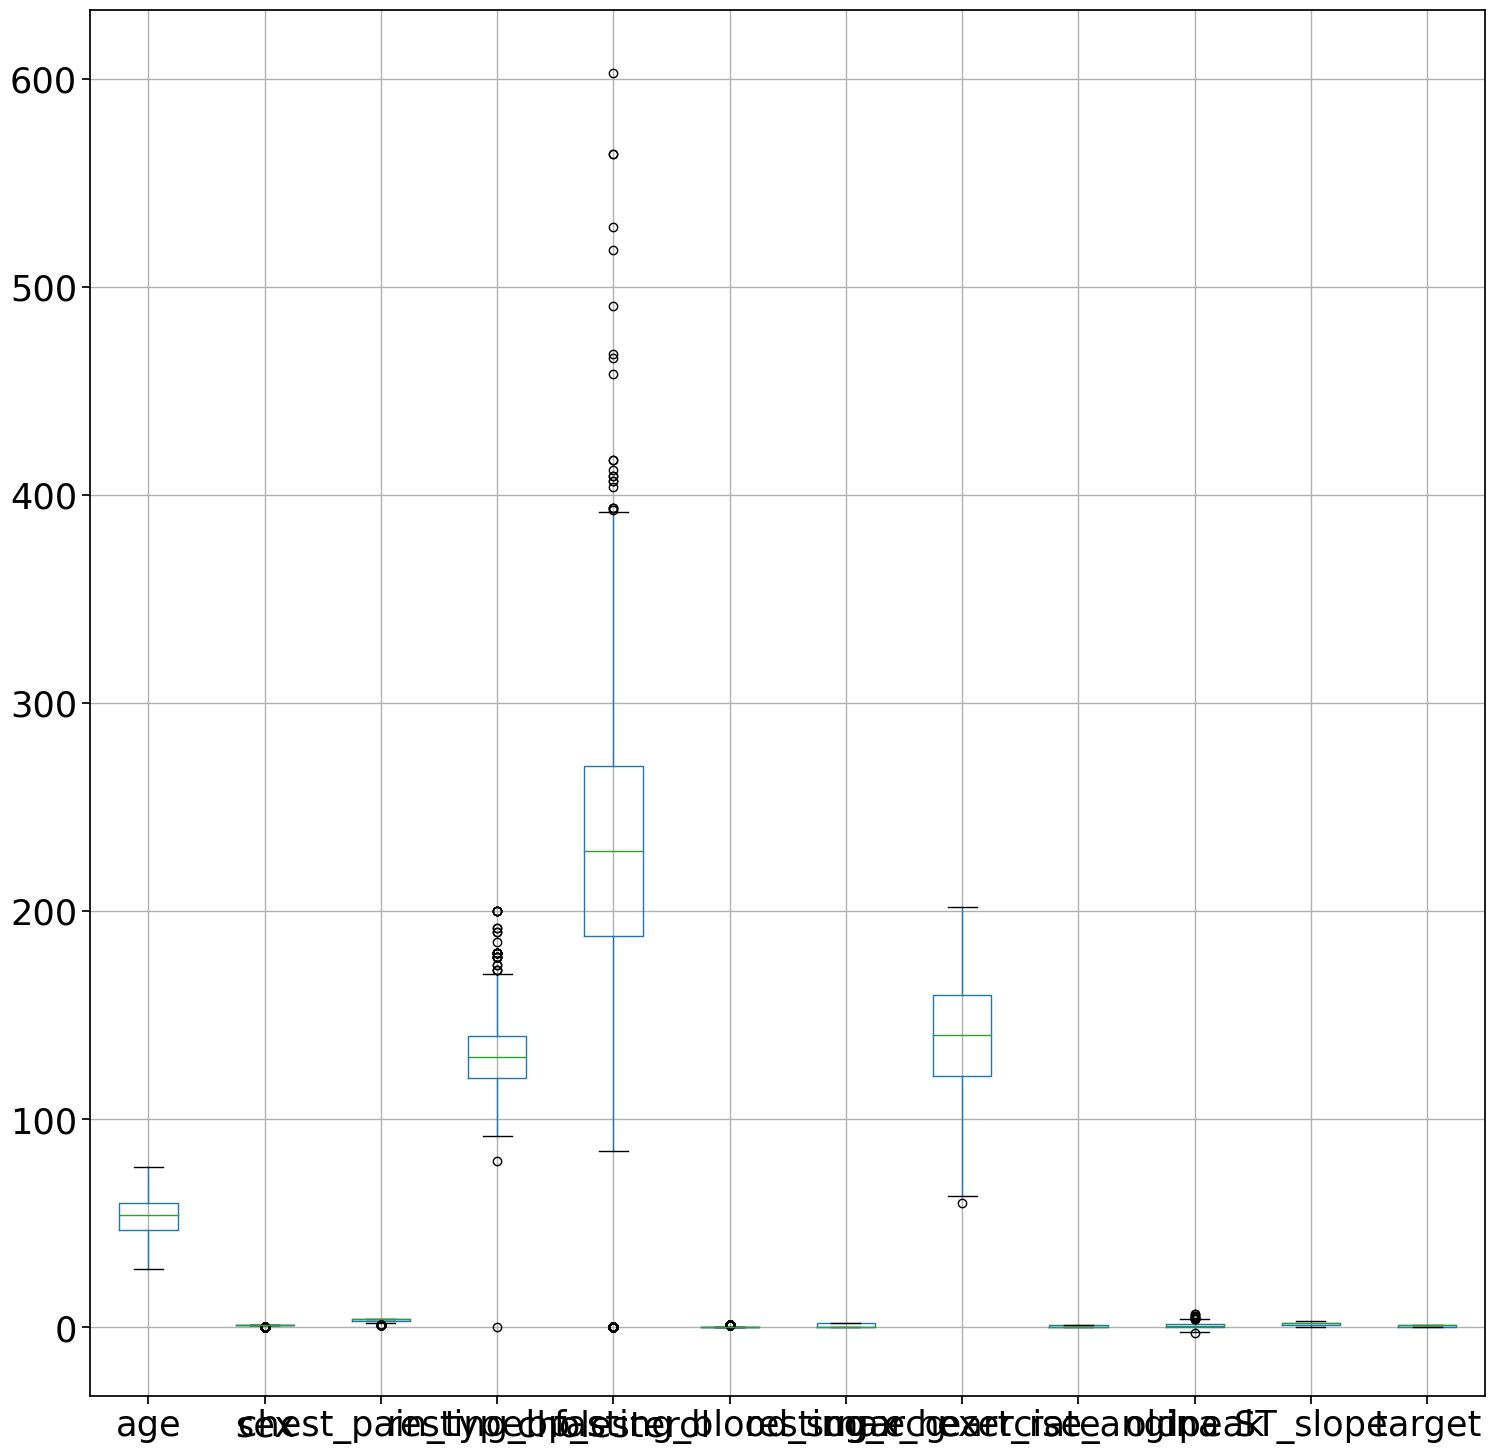

In [55]:
#box plot to see any outlier

data.boxplot(figsize=(18,18))
#we can clearly see our several varibles have outlier which will reduce the performance

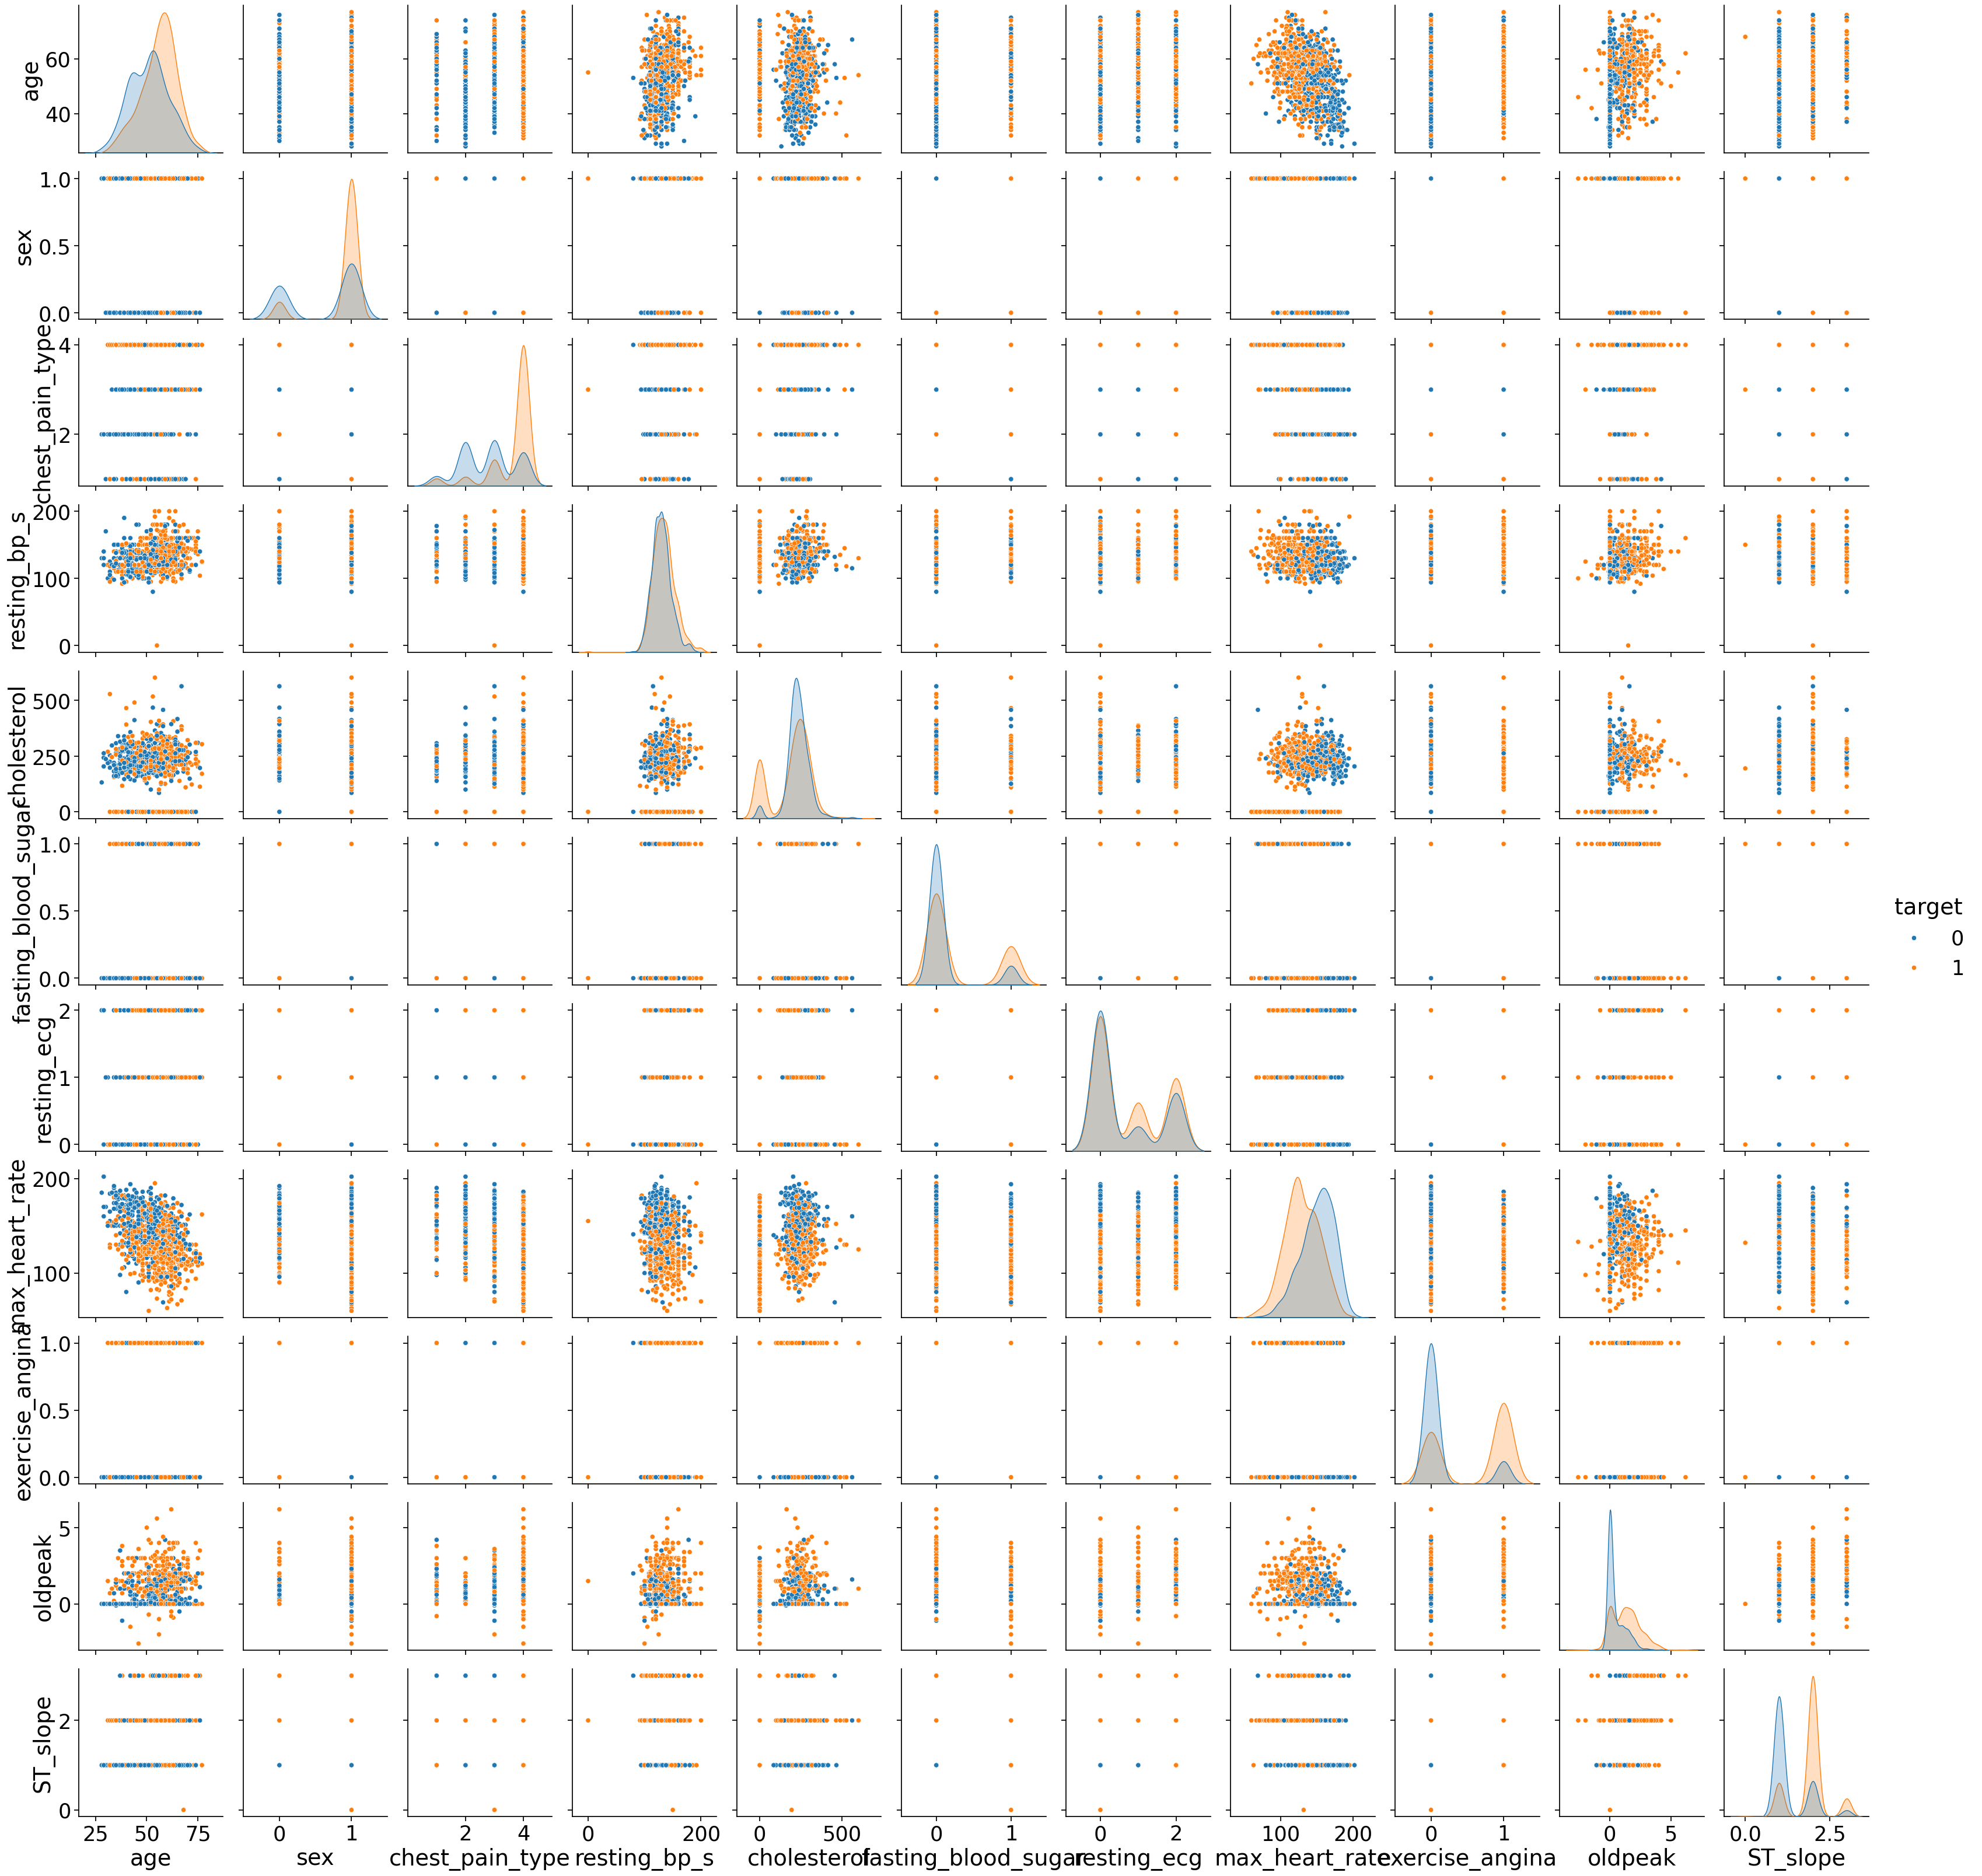

In [56]:
#visualization
sns.pairplot(data,hue="target",height=3,aspect=1);

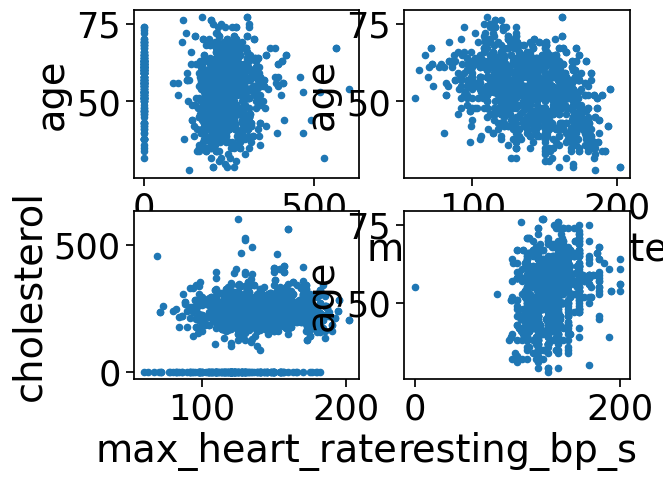

In [57]:
ax=plt.subplot(2,2,1)
data.plot(kind='scatter',y='age',x='cholesterol',ax=ax)
#major of the data are within the 200-300
#We found one outlier the chol is more than 500

ax=plt.subplot(2,2,2)
data.plot(kind='scatter',y='age',x='max_heart_rate',ax=ax)

ax=plt.subplot(2,2,3)
data.plot(kind='scatter',y='cholesterol',x='max_heart_rate',ax=ax)

ax=plt.subplot(2,2,4)
data.plot(kind='scatter',y='age',x='resting_bp_s',ax=ax)
plt.show()

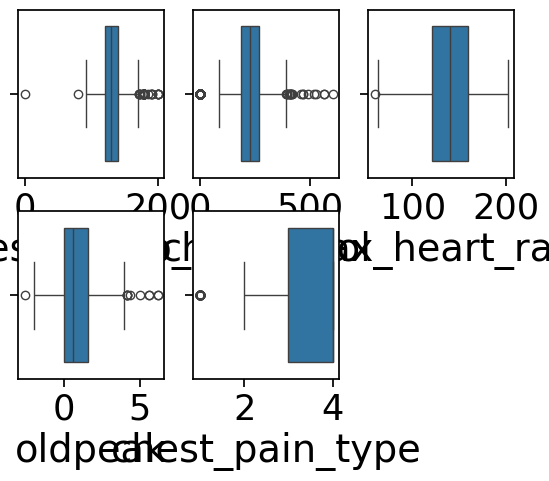

In [58]:
#each attribute outlier closer look
ax=plt.subplot(2,3,1)
sns.boxplot(x=data['resting_bp_s'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=data['cholesterol'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=data['max_heart_rate'])

ax=plt.subplot(2,3,4)
sns.boxplot(x=data['oldpeak'])

ax=plt.subplot(2,3,5)
sns.boxplot(x=data['chest_pain_type'])

plt.show()

In [59]:
#outlier remove process...
#IQR inter quartile range

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR)))

age                    13.00
sex                     0.00
chest_pain_type         1.00
resting_bp_s           20.00
cholesterol            81.75
fasting_blood_sugar     0.00
resting_ecg             2.00
max_heart_rate         39.00
exercise_angina         1.00
oldpeak                 1.60
ST_slope                1.00
target                  1.00
dtype: float64
        age    sex  chest_pain_type  resting_bp_s  cholesterol  \
0     False  False            False         False        False   
1     False   True            False         False        False   
2     False  False            False         False        False   
3     False   True            False         False        False   
4     False  False            False         False        False   
...     ...    ...              ...           ...          ...   
1185  False  False             True         False        False   
1186  False  False            False         False        False   
1187  False  False            False        

In [60]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape
#more than 600 records deleted

((1190, 12), (559, 12))

In [61]:
#extract feature and target
X=data_out.drop(columns=['target'])
y=data_out['target']

In [62]:
#split the dataset into train and test 10%
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((475, 11), (84, 11), (475,), (84,))

In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,classification_report

accuracy score = 96.43 
ROC AUC score = 0.9583333333333333


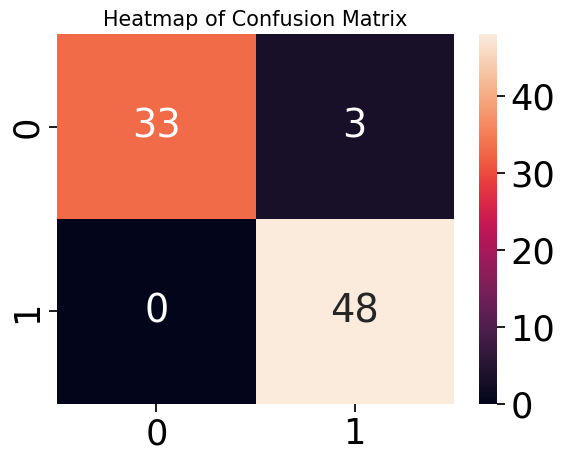

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.94      1.00      0.97        48

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def train_model(model):
    model_instance = model()
    model_instance.fit(X_train, y_train)

    print("accuracy score = {} ".format(round(accuracy_score(y_test, model_instance.predict(X_test)) * 100, 2)))
    print("ROC AUC score = {}".format(roc_auc_score(y_test, model_instance.predict(X_test))))
    cm = confusion_matrix(y_test, model_instance.predict(X_test))
    plt.title('Heatmap of Confusion Matrix', fontsize=15)
    sns.heatmap(cm, annot=True)
    plt.show()
    print(classification_report(y_test, model_instance.predict(X_test)))
    
    return model_instance

RF = train_model(RandomForestClassifier)

with open('RF.pkl', 'wb') as model_file:
    pickle.dump(RF, model_file)


accuracy score = 79.76 
ROC AUC score = 0.798611111111111


c:\Users\mibra\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


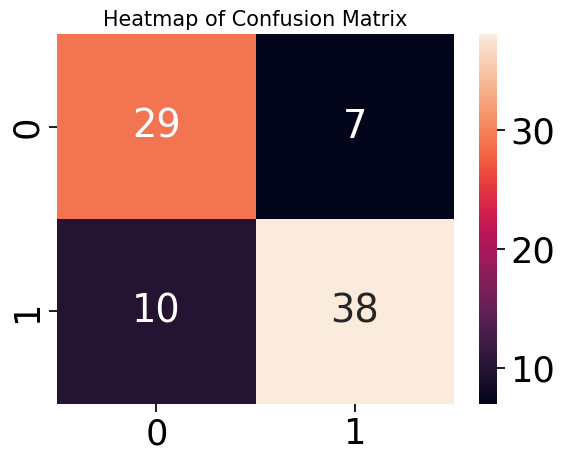

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        36
           1       0.84      0.79      0.82        48

    accuracy                           0.80        84
   macro avg       0.79      0.80      0.80        84
weighted avg       0.80      0.80      0.80        84



In [82]:
from sklearn.linear_model import LogisticRegression

LR = model(LogisticRegression)

accuracy score = 72.62 
ROC AUC score = 0.7222222222222222


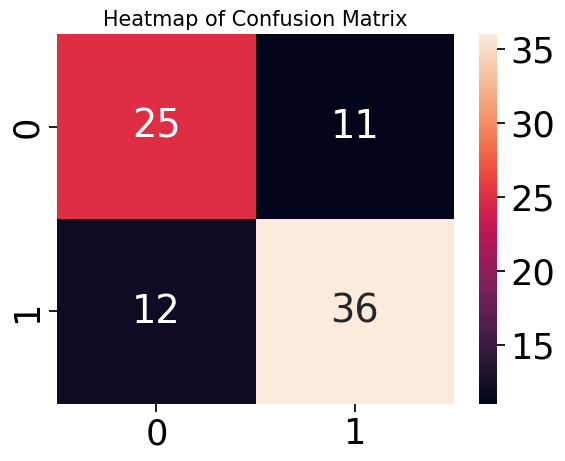

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        36
           1       0.77      0.75      0.76        48

    accuracy                           0.73        84
   macro avg       0.72      0.72      0.72        84
weighted avg       0.73      0.73      0.73        84



In [83]:
from sklearn.svm import SVC
svc = model(SVC)

accuracy score = 67.86 
ROC AUC score = 0.6805555555555555


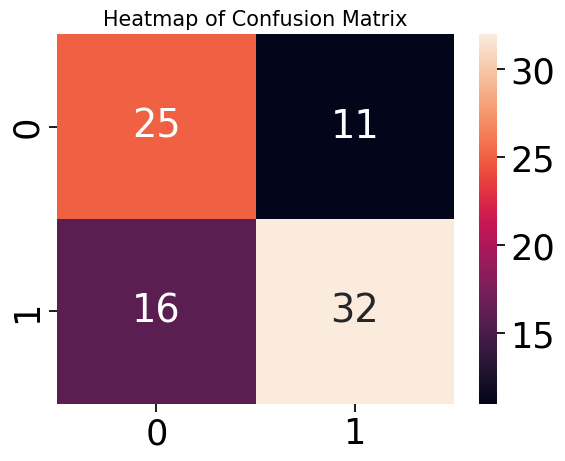

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        36
           1       0.74      0.67      0.70        48

    accuracy                           0.68        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.69      0.68      0.68        84



In [84]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = model(KNeighborsClassifier)

accuracy score = 94.05 
ROC AUC score = 0.9375000000000001


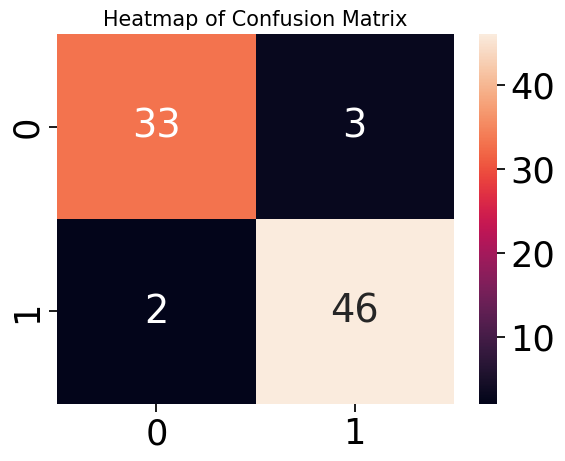

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.94      0.96      0.95        48

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



In [85]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB = model(GradientBoostingClassifier)

accuracy score = 82.14 
ROC AUC score = 0.8194444444444445


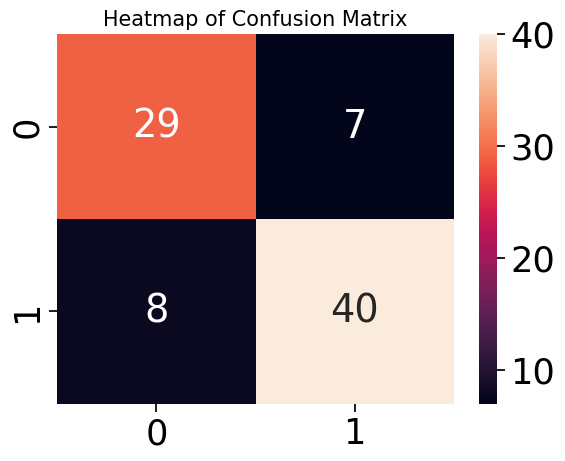

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        36
           1       0.85      0.83      0.84        48

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



In [86]:
#Naivye Bayes
from sklearn.naive_bayes import GaussianNB
GNB = model(GaussianNB)